In [1]:
import sys
sys.path.append('../src')

import realvirtual_yolo as rvy

# YOLO Model Test

In [2]:
training_folder = 'C:/Users/VincentRoller/Desktop/lego-demo'

In [3]:
! yolo checks



Ultralytics YOLOv8.2.83 🚀 Python-3.9.19 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete ✅ (16 CPUs, 15.7 GB RAM, 296.3/476.0 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.9.19
Install             pip
RAM                 15.71 GB
CPU                 11th Gen Intel Core(TM) i7-11800H 2.30GHz
CUDA                12.4

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.9.2>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.3.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.0>=1.8.0
torchvision         ✅ 0.19.0>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 6.0.0
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytics-thop    ✅ 2.0.5>=2.0.0


In [4]:
samples, annotations = rvy.pp.load_samples(training_folder)

Loaded 801 samples
Sample shape: (640, 640, 3)
Annotation shape: (5, 5)


[1.         0.7014132  0.6077372  0.09176107 0.1158198 ]
[1.         0.377701   0.6804299  0.07887199 0.115468  ]
[2.         0.02993246 0.591085   0.1717799  0.06840944]
[3.        0.13251   0.1838375 0.2206224 0.1835659]


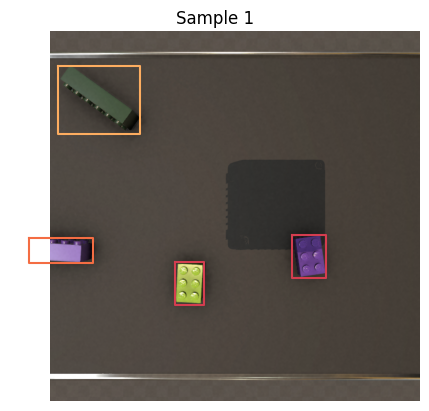

In [5]:
rvy.pp.show_sample(samples, annotations, 1)

### YOLOv10 by Ultralytics

See the [GitHub](https://github.com/ultralytics/ultralytics) page for details and the [Docs](https://docs.ultralytics.com/) for full documentation on training, validation, prediction and deployment.

`YOLOv10n` Smallest and fastest model, suitable for low-power devices and real-time applications.

`YOLOv10s` Medium-sized model with a good balance of speed and accuracy.

`YOLOv10m` Medium-sized model with slightly higher accuracy than YOLOv8s.

`YOLOv10l` Large model with high accuracy but slower speed.

`YOLOv10x` Extra-large model with the highest accuracy but the slowest speed.

In [10]:
from ultralytics import YOLO

In [11]:
device = rvy.pp.get_device()
device

device(type='cuda')

In [12]:
# yolov8n, yolov8s, yolov8m, yolov8l, yolov8x
available_models = ['yolov10n', 'yolov10s', 'yolov10m', 'yolov10l', 'yolov10x']

In [21]:
pretrained_model_name = 'yolov10n'

In [22]:
model = YOLO(f"{pretrained_model_name}.pt").to(device)  # load a pretrained model (recommended for training)
model.device

device(type='cuda', index=0)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\VincentRoller\wkspaces\game4automation-release\game4automation\realvirtual\Assets\realvirtual\Professional\VisionAI\python\notebooks\bus.jpg: 640x480 4 persons, 1 bus, 28.3ms
Speed: 29.2ms preprocess, 28.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


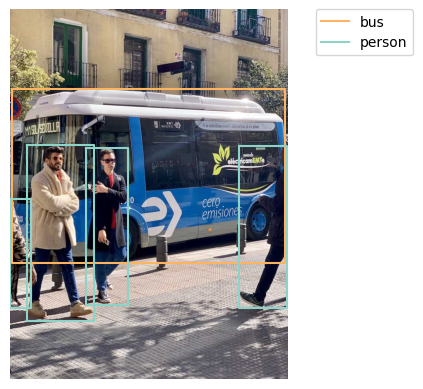

In [23]:
results = model.predict("https://ultralytics.com/images/bus.jpg")  # predict on an image
rvy.show_results(results, model)


0: 640x640 1 remote, 1 cell phone, 39.4ms
Speed: 7.1ms preprocess, 39.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


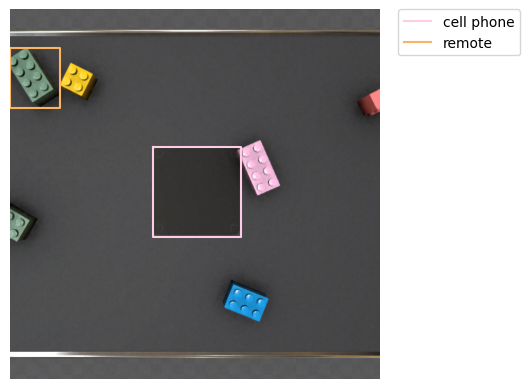

In [24]:
sample = samples[4]

results = model.predict(
    sample,
    imgsz=640,  # default is 640
    conf=0.1,  # default is 0.25
)

rvy.show_results(results, model)